# Predicting Heart Disease in Patients Using Classification

### Introduction:

Heart disease, also known as cardiovascular disease, refers to conditions which affect the heart, the most common of these conditions being coronary artery disease. Heart disease can lead to heart attacks, heart failure, arrhythmias and heart valve diseases. Some risk factors include high blood pressure, high cholesterol, obesity, and a sedentary lifestyle.

The question we attempt to answer is, "Can we predict the severity of heart disease, if any, in a patient based on their age, pain type, cholesterol, max heart rate, exercise induced angina, and gender?".

To answer this, the chosen data set is the “Heart Disease” dataset. Each observation contains details about an individual. It contains 14 variables with different attributes relating to heart disease, including an assigned value of 1-4 regarding the presence of heart disease in the individual.


### Preliminary Exploratory Data Analysis:


Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0
5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0
6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0


severity,n,percent
<fct>,<int>,<dbl>
0,6,6.593407
1,36,39.560440
2,23,25.274725
3,23,25.274725
4,3,3.296703


`summarise()` has grouped output by 'severity'. You can override using the
`.groups` argument.


severity,pain_type,n,percent
<fct>,<chr>,<int>,<dbl>
0,asymptomatic,2,2.197802
0,atypical angina,1,1.098901
0,non-anginal,3,3.296703
1,asymptomatic,29,31.868132
1,non-anginal,6,6.593407
1,typical angina,1,1.098901
2,asymptomatic,22,24.175824
2,typical angina,1,1.098901
3,asymptomatic,20,21.978022


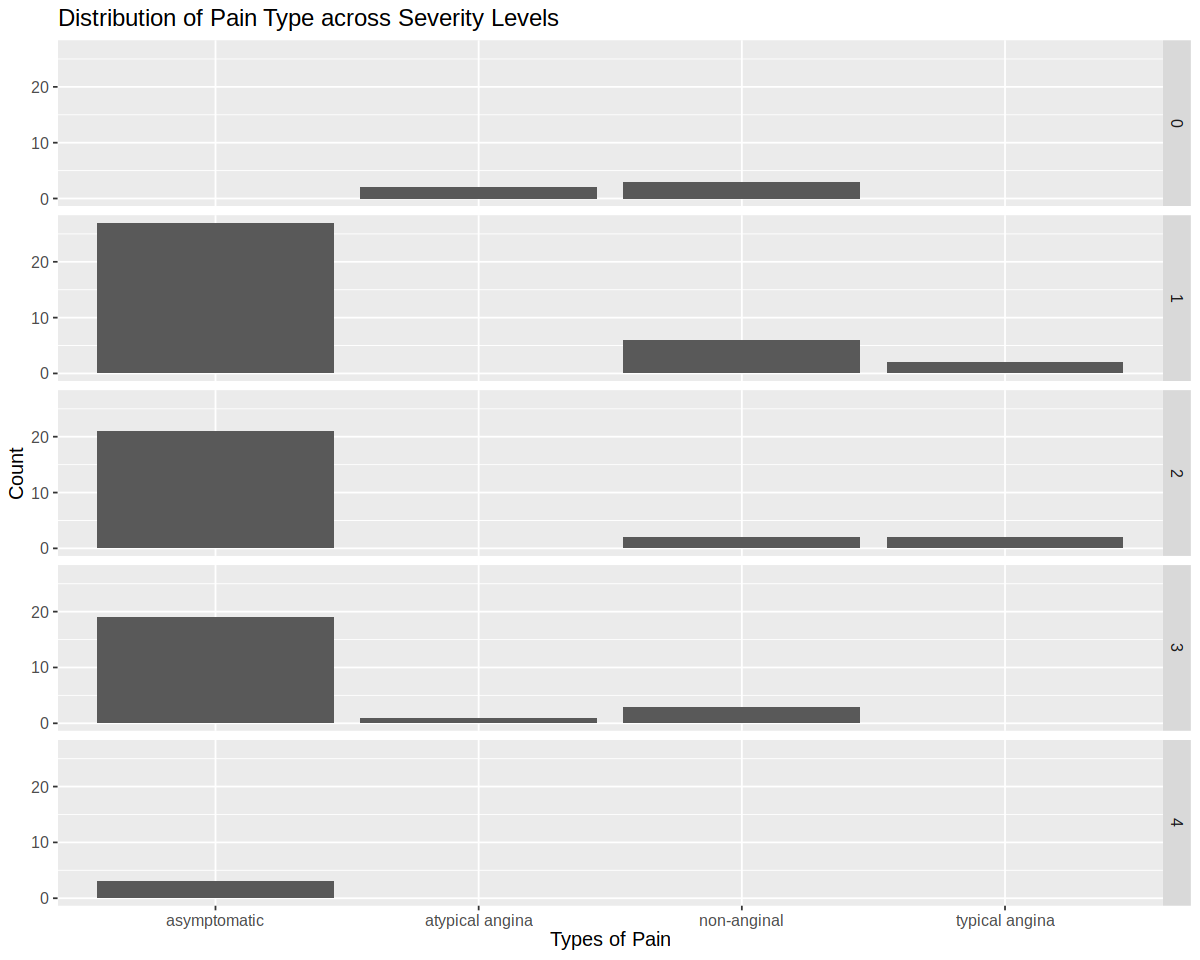

In [8]:
#Load all libraries and set plot dimensions
options(repr.plot.height = 8, repr.plot.width = 10)
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)

#Load data frame and rename columns
urlfile= "https://raw.githubusercontent.com/cocom250/DSCI-100-Group-17/main/heart_disease_uci.csv"
heart_disease_data <- read_csv(url(urlfile))
head(heart_disease_data)

heart_disease_data <- rename(heart_disease_data, 
                             region = dataset,
                             pain_type = cp,
                             resting_bps = trestbps,
                             fasting_bs = fbs,
                             resting_ecg = restecg,
                             max_hr = thalch,
                             n_major_vessel = ca,
                             severity = num) 

#Cleaning up data, filtering for Switzerland and selecting predictor columns
heart_disease_data <- filter(heart_disease_data, region == "Switzerland") |>
    mutate(severity = as.factor(severity)) |>
    select(severity, age, pain_type, chol, max_hr, exang, resting_ecg, sex)

#Split the data into training set and testing set
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = severity)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

#Plot indicating the number and proportion of observations in each severity level
severity_distribution <- heart_disease_train |>
    group_by(severity) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_disease_train))

severity_distribution

#Plot indicating the number and proportion of observations with each pain type for different severity level
pain_type_distribution <- heart_disease_train|>
    group_by(severity, pain_type) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_disease_train))

pain_type_distribution

#Visualization of Pain Type distribution across severity levels
pain_type_distribution_plot <- ggplot(pain_type_count, 
                                 aes(x= pain_type, y =n)) +
    geom_bar(stat ="identity") +
    labs(x = "Types of Pain", y = "Count")+
    theme(text = element_text(size =12)) +
    facet_grid(rows = vars(severity)) +
    ggtitle("Distribution of Pain Type across Severity Levels")

pain_type_distribution_plot

### Expected Outcomes & Significance

Through our project, we expect to find a classification model which accurately predicts the severity of heart disease in patients from Switzerland.

What impact could such findings have?

     Since we can predict whether patients have heart disease or not, for those who are classified to have heart          disease but do not have medical check-ups yet, we can encourage them to check their heart before the disease          becomes prominently serious.
     
What future questions could this lead to?

     First question would be which factors have the most influence on our prediction. For example, sex, age, pain          type, etc, which factors are mostly related to the patients’ heart disease?

     Second question would be after finding out the answer for the first question, how can we “weight” “each factor”      “differently”, not equally therefore we can increase our prediction model in terms of precision and accuracy.
